### Model Usage


Both Pytorch and Keras (TensorFlow) are heralded for their ability to allow users to build models spanning a variety of use cases without much hassle; they have quite a lot of similarities and are not without their differences either.

To comprehensively discuss the distinctions we will scrutinize both frameworks separately building on the same use case, before doing so we will discuss some initial differences regarding module usage.

In [1]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras import layers
from tensorflow.keras import Model
import time

Strictly speaking about model building, both frameworks contain a vast variety of building blocks present in DL models, such as linear layers and convolutional layers. Users build models by instantiating these modules and chaining them in succession. Their instantiation requires the user to input certain parameters relating to the details of that part of the model.

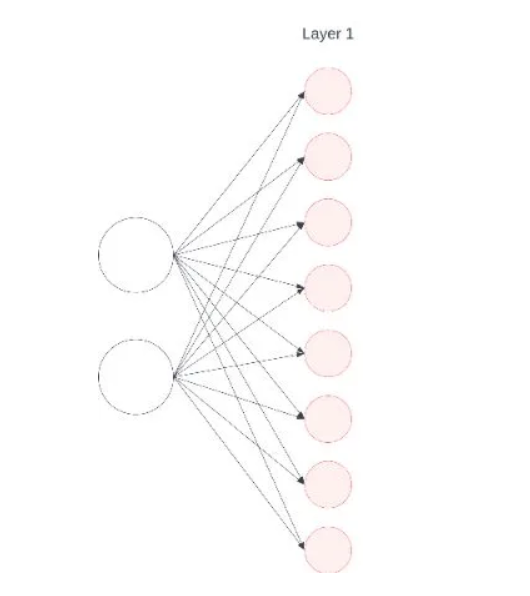

A linear layer would normally need two parameters, the number of inputs, and the number of neurons in the layer (number of outputs). Both Keras and PyTorch handle these inputs in different ways. For the layer above, it can be seen that there are 2 inputs, and 8 neurons (or outputs), This is how the following layer would be defined in both PyTorch and Tensorflow (Keras):

In [2]:
ll_torch = nn.Linear(in_features=2, out_features=8)
ll_keras = layers.Dense(units=8)

# One difference that can be seen here is the need to specify the number
# of input arguments in PyTorch which is not the case in Keras. Keras
# will automatically infer the inputs during runtime

PyTorch provides its DL tools from the nn module. Similarly, TensorFlow DL tools can be found within the tensorflow.keras.layers module.

### Model Building Example

We will be working on a real-world dataset to solve a multi-class classification problem, just to provide some background. identifying/segregating or allocating samples to a class to which they may belong using sample data is known as a classification problem. An example of this would be identifying pet photographs as belonging to a dog, cat, or hamster.

For our problem, we will be classifying between 3 types of flowers using 4 attributes about them — [the Iris dataset](https://www.kaggle.com/datasets/uciml/iris).
Our model model contains 4 layers: 1 input layer, 2 hidden layers, and 1 output layer.  

#### PyTorch

PyTorch provides a unified approach to model construction, primarily achieved through the use of classes (so some knowledge of object-oriented programming will be required). This involves defining the necessary operations within the __init__ function — specifying the model's components, and outlining how these operations are applied to input data in the forward function.

In [2]:
class SimpleClassifier(nn.Module):

  def __init__(self, input_size, num_classes,hidden_size=8):

    super(SimpleClassifier, self).__init__()
    self.layer_1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.scaling_factor = torch.tensor(1.0, requires_grad=True)
    self.layer_2 = nn.Linear(in_features=hidden_size, out_features=hidden_size)
    self.output = nn.Linear(hidden_size, num_classes)
    self.relu = nn.ReLU()

# The forward method defines how the input x will interact with our
# model’s components
  def forward(self, x):

    x = self.layer_1(x)   # input x be passed into the first linear layer
    x = self.relu(x)      # ReLU activation function is applied to the intermediate output
    x = self.layer_2(x)   # passed through the second layer
    x = self.relu(x)      # ReLU activation.
    x = self.scaling_factor * x
    x = self.output(x)    # passed through the output layer

iris_model = SimpleClassifier(input_size=4, num_classes=3)



It should be highlighted that the actions carried out in this network are simple in the sense that no further processing is applied to the intermediate outputs. As a result, less lines of code may be used to write the same model.

In [3]:
# While this doesn’t count as a different way of defining a model in PyTorch,
# it highlights an import tool from the nn module that allows the chaining
# of “sequential” operations using the Sequential() class.

class SuperSimpleClassifier(nn.Module):

  def __init__(self, input_size, num_classes,hidden_size=8):
    super(SuperSimpleClassifier, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )
  def forward(self, x):
    return self.model(x)

With its class-based approach, PyTorch is often tagged as being a Pythonic framework where model building follows principles of the Python programming language. As a result it is also possible to inherit from separate abstract classes as we can see below

In [4]:
class BasicClassifier():

# simple abstract class that provides a method which gives class probabilities,
# it uses the num_classes attribute to determine whether it's a binary or a
# multi-class classification problem before returning the class probabilities.

  def predict_probability(self, x):

    y = self(x)
    if self.num_classes == 1:
      y = nn.Sigmoid()(x)
    else:
      y = nn.Softmax(dim=1)(x)

    return y

class SuperSimpleClassifier(nn.Module, BasicClassifier):

  def __init__(self, input_size, num_classes,hidden_size=8):

    super().__init__()
    self.num_classes = num_classes
    self.model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )

  def forward(self, x):

    return self.model(x)



All in all, PyTorch provides a simple yet flexible way for users to define models, however, at times it could get a bit boiler-platey.

#### TensorFlow

On the other hand, TensorFlow provides 3 different ways in which a model can be defined with increasing felxibility and room for customisation. As a result this is a comfortable choice for both beginners as well as advanced programmers.
1. Sequential API
2. Functional API
3. Model Subclassing

In [5]:
# Sequential API
simple_classifier = tf.keras.Sequential(
    [
        layers.Dense(units=8, activation="relu"),
        layers.Dense(units=8, activation="relu"),
        layers.Dense(units=3, activation="softmax")
    ]
    )



The model isn’t complete at this point, a model in TensorFlow needs to be “compiled” before training; compiling a model requires calling the compile function on the model. We will demonstrate that later.

The Keras “functional” API allows models to be built by chaining outputs of intermediate layers — similar to the repeated calling of functions on outputs.
Once the model is declared, it still needs to be compiled.

In [6]:
# Functional API
inputs = tf.keras.Input(shape=(2,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

As an example of how this is important, suppose for some reason you wanted to scale the outputs of the first layer by 10, it’s quite easy and can be done as follows

In [7]:
# Functional API , scaling intermediate outputs
inputs = tf.keras.Input(shape=(2,))
x = layers.Dense(units=8, activation="relu")(inputs)
#Output of first layer

#Scaling the output
x = x * 10
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

While the functional API is what a large proportion or cases will require, there are some use cases which you can’t directly accomplish, for example, the scaling operation, let’s say rather than a predetermined value, you want it to be learned during training; trying to incorporate this into this approach, while possible, is not straight forward and that’s precisely what the 3rd category of model building is for — even more intricate interactions

In [8]:
# Model Subclassing method (closest to PyTorch implementation)
class SimpleClassifier(Model):

  def __init__(self, input_dim, hidden_dim=8, num_classes=3):
    super().__init__()

    self.layer_1 = layers.Dense(units=hidden_dim, activation="relu")
    self.layer_2 = layers.Dense(units=hidden_dim, activation="relu")
    self.output_layer = layers.Dense(units=num_classes, activation="softmax")
    self.scaling_factor = self.add_weight(name="scaling_factor", initializer=tf.keras.initializers.Constant(1), trainable=True)

  def call(self, x):

    x = self.layer_1(x)
    x = x * self.scaling_factor
    x = self.layer_2(x)
    output = self.output_layer(x)

    return output

Similar to PyTorch, the class subclasses the Model instance from tensforflow.keras, the same one used in the functional API, it defines internal operations in the __init method while defining the way they are applied to the input in the call method

## Model Training

Once a model is built, it only comes into effect after it has been trained on its specific task. To start, we’ll import the data from sklearn and split it into train and test sets.

### PyTorch

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=25)

In [11]:
test_X.shape

(50, 4)

In [12]:
y.shape

(150,)

 We can implement a simple batching procedure through array slicing

In [10]:
batch_size = 16
num_batches = len(train_X) // batch_size

for batch in range(num_batches+1):
  start = batch * batch_size
  end = start + batch_size
  data_batch = train_X[start:end]
  print(data_batch.shape)

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(4, 4)


We can also use DataLoader from pyTorch (torch.utils)

In [10]:
# Create DataLoader for shuffling and batching for training and validation
train_data = list(zip(train_X, train_y))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)

val_data = list(zip(test_X, test_y))
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle=False)

Implementing **early stopping** to prevent overfitting by monitoring the model's performance on the validation set during training and stopping the training process once the performance starts to degrade, thus avoiding unnecessary computational costs and improving generalization.

In [11]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0, path='checkpoint.pth'):
        self.patience = patience
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
        elif val_loss > self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}\n')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        torch.save(model.state_dict(), self.path)


Since this is a multi-class classification problem the loss function will be the categorical cross-entropy loss, and we’ll choose the optimizer to be RMSProp (the fact that this is a classification problem doesn’t impact the optimizer choice).

In [12]:
model = SuperSimpleClassifier(4, 3, 64)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=1e-3)
early_stopping = EarlyStopping(patience=5, path='model_checkpoint.pth')

The training process can be aptly described by the following flowchart and can be interpreted as a nested for-loop:

-> The outer for-loop loops over the number of epochs

-> The inner for-loop loops over batches of data

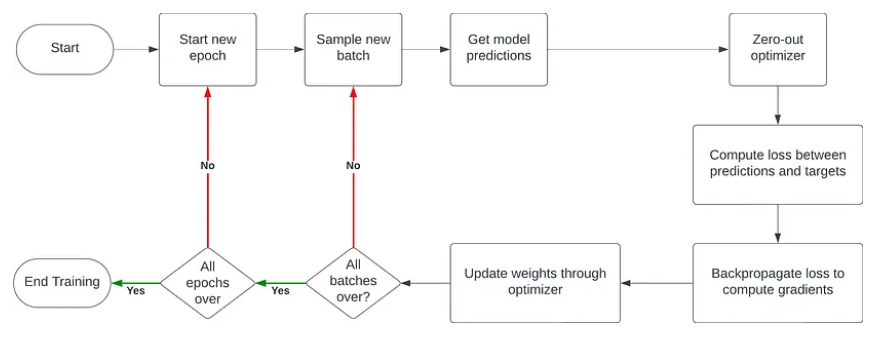

Epoch 1 - Training loss: 1.1024817313466753, Training accuracy: 0.34
Validation loss: 0.8500267565250397, Validation accuracy: 0.66


Epoch 2 - Training loss: 0.7848410861832755, Training accuracy: 0.67
Validation loss: 0.7685455083847046, Validation accuracy: 0.74


Epoch 3 - Training loss: 0.6160597588334765, Training accuracy: 0.75
Validation loss: 0.6078919991850853, Validation accuracy: 0.66


Epoch 4 - Training loss: 0.5422069600650242, Training accuracy: 0.76
Validation loss: 0.4295365661382675, Validation accuracy: 0.84


Epoch 5 - Training loss: 0.43417362230164663, Training accuracy: 0.88
Validation loss: 0.3955448232591152, Validation accuracy: 0.72


Epoch 6 - Training loss: 0.43289620535714285, Training accuracy: 0.86
Validation loss: 0.39315610378980637, Validation accuracy: 0.82


Epoch 7 - Training loss: 0.3936951075281416, Training accuracy: 0.86
Validation loss: 0.3089116960763931, Validation accuracy: 0.9


Epoch 8 - Training loss: 0.36358529329299927, Training accur

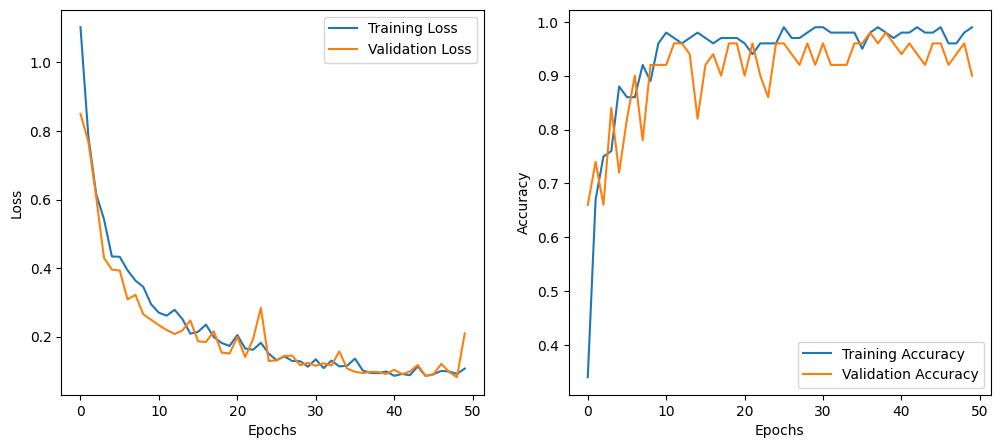

In [13]:
import matplotlib.pyplot as plt

# Training loop
epochs = 50
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = []

start_time = time.time()

for epoch in range(epochs):
    # Training
    model.train()
    epoch_loss = 0
    correct_train = 0
    total_train = 0

    for x_batch, y_batch in train_loader:
        x = torch.as_tensor(x_batch, dtype=torch.float32)
        y = torch.as_tensor(y_batch, dtype=torch.long)

        predictions = model(x)
        loss = criterion(predictions, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        _, predicted_train = torch.max(predictions.data, 1)
        total_train += y.size(0)
        correct_train += (predicted_train == y).sum().item()

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)
    train_accuracy = correct_train / total_train
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch + 1} - Training loss: {epoch_loss}, Training accuracy: {train_accuracy}")

    # Validation
    model.eval()
    val_loss = 0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = torch.as_tensor(x_val, dtype=torch.float32)
            y_val = torch.as_tensor(y_val, dtype=torch.long)

            val_predictions = model(x_val)
            val_loss += criterion(val_predictions, y_val).item()

            _, predicted_val = torch.max(val_predictions.data, 1)
            total_val += y_val.size(0)
            correct_val += (predicted_val == y_val).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}\n\n")

    # Check early stopping
    early_stopping(val_loss, model)

    if early_stopping.early_stop:
        print("\n EARLY STOPPING\n")
        break

end_time = time.time()
et = end_time - start_time
print(f"PyTorch Training took {et} seconds.")

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Keras

In [14]:
inputs = tf.keras.Input(shape=(4,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        'accuracy',
    ]
)

In [17]:
start_time = time.time()
history =model.fit(x=train_X, y=train_y, epochs=70, batch_size = 16)
end_time = time.time()
et = end_time - start_time
print(f"TensorFlow 'fit' loop took {et} seconds.")

Epoch 1/70
7/7 [==============================] - 2s 5ms/step - loss: 1.0582 - accuracy: 0.4200
Epoch 2/70
7/7 [==============================] - 0s 4ms/step - loss: 1.0161 - accuracy: 0.3800
Epoch 3/70
7/7 [==============================] - 0s 4ms/step - loss: 0.9948 - accuracy: 0.4200
Epoch 4/70
7/7 [==============================] - 0s 4ms/step - loss: 0.9711 - accuracy: 0.4100
Epoch 5/70
7/7 [==============================] - 0s 4ms/step - loss: 0.9558 - accuracy: 0.4400
Epoch 6/70
7/7 [==============================] - 0s 4ms/step - loss: 0.9239 - accuracy: 0.4000
Epoch 7/70
7/7 [==============================] - 0s 4ms/step - loss: 0.9068 - accuracy: 0.3800
Epoch 8/70
7/7 [==============================] - 0s 4ms/step - loss: 0.8766 - accuracy: 0.3800
Epoch 9/70
7/7 [==============================] - 0s 4ms/step - loss: 0.8559 - accuracy: 0.4500
Epoch 10/70
7/7 [==============================] - 0s 4ms/step - loss: 0.8315 - accuracy: 0.4700
Epoch 11/70
7/7 [======================

Keras makes it extremely easy to use validation data by defining the aforementioned proportion as a float between 0 and 1. Alternatively, a separate validation dataset may be provided.

In [ ]:
# note that this will consdierably longer as we are also performing a
# validation loop

start_time = time.time()
history = model.fit(x=train_X, y=train_y, epochs=70, validation_split=0.2)
end_time = time.time()
et = end_time - start_time
print(f"TensorFlow 'fit' loop took {et} seconds.")

### Custom Training Loop

Custom training loops may be constructed with Tensorflow, however they need a little more work than those written with PyTorch. First of all, it needs the usage of context managers. Secondly, Tensorflow function calls require the input of parameters, which might be confusing in contrast to PyTorch's straightforward function calls for gradient computation and weight updates.

Unlike PyTorch which uses a dynamic computation graph, Tensorflow needs to be told to start recording computations, gradients are explicitly computed between the loss function and model parameters, and the optimizer applies weight updates by pairing up each gradient with the corresponding model weight.

#### Slow (eager execution)

Done with epoch - 1 - loss for epoch 1.413594365119934, accuracy: 0.37
Validation loss: 1.2441469430923462, accuracy: 0.26
Done with epoch - 2 - loss for epoch 1.2922676801681519, accuracy: 0.37
Validation loss: 1.1612814664840698, accuracy: 0.26
Done with epoch - 3 - loss for epoch 1.2230010032653809, accuracy: 0.37
Validation loss: 1.1027930974960327, accuracy: 0.26
Done with epoch - 4 - loss for epoch 1.1730492115020752, accuracy: 0.37
Validation loss: 1.0597858428955078, accuracy: 0.26
Done with epoch - 5 - loss for epoch 1.1377344131469727, accuracy: 0.38
Validation loss: 1.031996250152588, accuracy: 0.26
Done with epoch - 6 - loss for epoch 1.1172282695770264, accuracy: 0.38
Validation loss: 1.0124800205230713, accuracy: 0.32
Done with epoch - 7 - loss for epoch 1.102665901184082, accuracy: 0.38
Validation loss: 0.9979405999183655, accuracy: 0.34
Done with epoch - 8 - loss for epoch 1.0907169580459595, accuracy: 0.41
Validation loss: 0.9856971502304077, accuracy: 0.32
Done with e

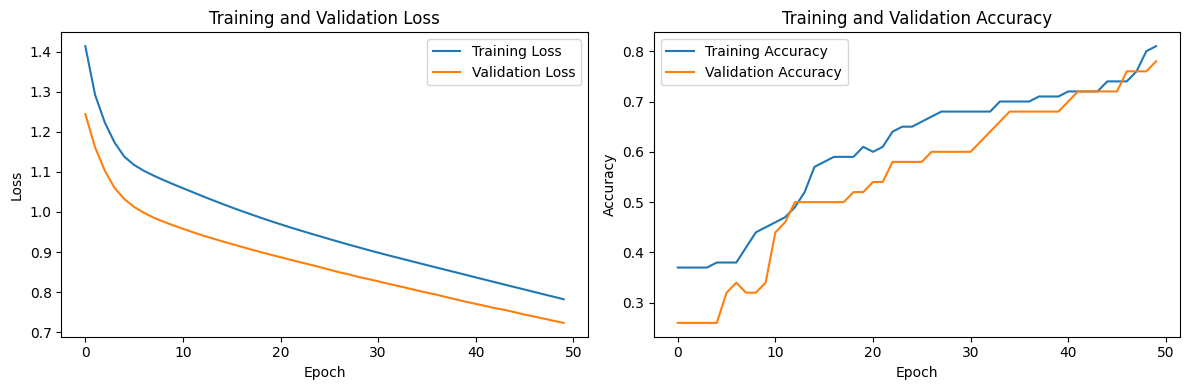

In [18]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 16
val_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(batch_size)
inputs = tf.keras.Input(shape=(4,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

optimizer = tf.keras.optimizers.RMSprop(1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

epochs = 50
batch_size = 16
num_batches = len(train_X) // batch_size

# Early stopping parameters
patience = 5
best_val_loss = float('inf')
no_improvement_count = 0

# Lists to store training and validation metrics
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

start_time = time.time()
epochs = 50
for e in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for batch in range(num_batches + 1):
        start = batch * batch_size
        end = start + batch_size
        x = train_X[start:end]
        y = train_y[start:end]

        with tf.GradientTape() as tape:
            predictions = model(x, training=True)
            loss_value = loss(y, predictions)

        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        epoch_loss += loss_value
        epoch_accuracy += np.sum(np.argmax(predictions, axis=1) == y)

    epoch_loss /= num_batches
    epoch_accuracy /= len(train_X)

    # Append training metrics to history
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)

    print(f"Done with epoch - {e + 1} - loss for epoch {epoch_loss}, accuracy: {epoch_accuracy}")

    # Validation
    val_loss = tf.reduce_mean(loss(test_y, model(test_X, training=False)))
    val_predictions = model(test_X, training=False)
    val_accuracy = np.mean(np.argmax(val_predictions, axis=1) == test_y)

    # Append validation metrics to history
    val_loss_history.append(val_loss)
    val_accuracy_history.append(val_accuracy)

    print(f"Validation loss: {val_loss}, accuracy: {val_accuracy}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping at epoch {e + 1} with no improvement.")
            break
end_time = time.time()
et = end_time - start_time
print(f"Tensorflow loop took {et} seconds.")
# Plotting
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy_history, label='Training Accuracy')
plt.plot(val_accuracy_history, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Another significant drawback is that it runs much slower compared to either fit() or the PyTorch training loop. This is due to Tensorflow's default runtime utilizing eager execution, which executes lines of code immediately instead of constructing a computation graph to be run all at once. While this is helpful for debugging, it leads to slower model training. Fortunately, this can be accelerated by isolating the model training logic into its own function and applying the __@tf.function__ decorator. This enables the creation of a computation graph that can be executed as a whole, resulting in substantial speed improvements.

#### Fast (deferred, graph execution)


Using the @tf.function decorator results in the training loop being upto 4-5 times faster than before!

Done with epoch - 1 - loss for epoch 0.5961310267448425
Validation loss: 0.42371511459350586
Done with epoch - 2 - loss for epoch 0.5854222178459167
Validation loss: 0.4177566468715668
Done with epoch - 3 - loss for epoch 0.5781210660934448
Validation loss: 0.4125588536262512
Done with epoch - 4 - loss for epoch 0.571461021900177
Validation loss: 0.40779608488082886
Done with epoch - 5 - loss for epoch 0.5651273131370544
Validation loss: 0.4032486379146576
Done with epoch - 6 - loss for epoch 0.5589902997016907
Validation loss: 0.39885228872299194
Done with epoch - 7 - loss for epoch 0.5529758334159851
Validation loss: 0.3946058750152588
Done with epoch - 8 - loss for epoch 0.5471011996269226
Validation loss: 0.39057934284210205
Done with epoch - 9 - loss for epoch 0.5413931608200073
Validation loss: 0.38659271597862244
Done with epoch - 10 - loss for epoch 0.5357810854911804
Validation loss: 0.38267168402671814
Done with epoch - 11 - loss for epoch 0.5301986336708069
Validation loss: 

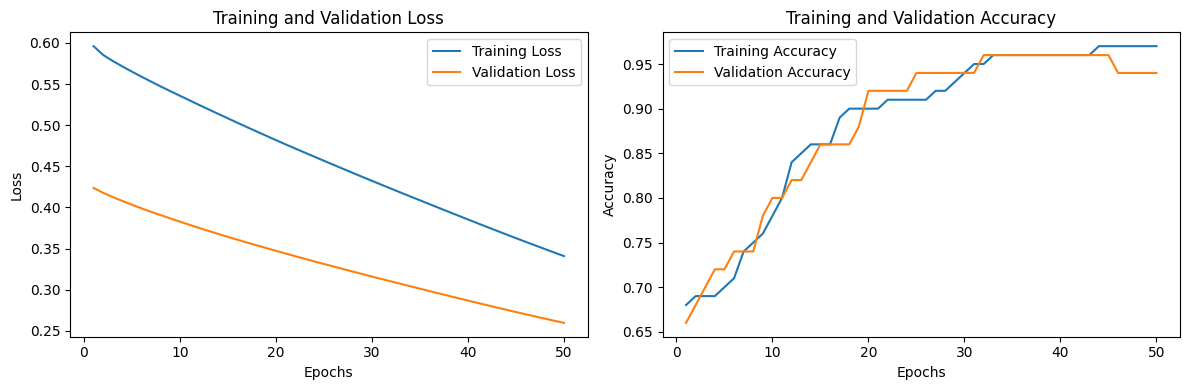

In [21]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        loss_value = loss(y, predictions)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    return loss_value

batch_size = 16
val_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y)).batch(batch_size)

model = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.RMSprop(1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy()

epochs = 50
batch_size = 16
num_batches = len(train_X) // batch_size

# Early stopping parameters
patience = 5
best_val_loss = float('inf')
no_improvement_count = 0

# Lists to store training and validation metrics
train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

start_time = time.time()

for e in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0

    for batch in range(num_batches + 1):
        start = batch * batch_size
        end = start + batch_size
        x = train_X[start:end]
        y = train_y[start:end]

        loss_value = train_step(x, y)

        epoch_loss += loss_value

    epoch_loss /= num_batches
    print(f"Done with epoch - {e + 1} - loss for epoch {epoch_loss}")

    # Training accuracy calculation
    predictions = model(train_X, training=False)
    epoch_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(train_y, predictions))

    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy.numpy())

    # Validation loss calculation
    val_loss = 0
    for val_x, val_y in val_dataset:
        predictions = model(val_x, training=False)
        val_loss += loss(val_y, predictions)
    val_loss /= len(val_dataset)

    print(f"Validation loss: {val_loss}")

    # Validation accuracy calculation
    val_accuracy = tf.reduce_mean(tf.keras.metrics.sparse_categorical_accuracy(test_y, model(test_X, training=False)))

    val_loss_history.append(val_loss.numpy())
    val_accuracy_history.append(val_accuracy.numpy())

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        no_improvement_count = 0
    else:
        no_improvement_count += 1
        if no_improvement_count >= patience:
            print(f"Early stopping at epoch {e + 1} with no improvement.")
            break

end_time = time.time()
et = end_time - start_time
print(f"Tensorflow loop took {et} seconds.")

# Plotting the results
epochs_range = range(1, len(train_loss_history) + 1)

plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss_history, label='Training Loss')
plt.plot(epochs_range, val_loss_history, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy_history, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy_history, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()